# WHAT THIS NOTEBOOK IS ALL ABOUT?
<a id="t0."></a>
## The whole notebook is divided into two parts :
### 1. Image Classification (i.e whether the Image has tumor or not)

**CONTENTS**:
1. [IMPORTING LIBRARIES AND DATASETS](#t1.)
2. [DATA VISUALIZATION](#t2.)
3. [CREATING TRAIN,VAL AND TEST DATASET](#t3.)
4. [TRAINING THE MODEL](#t4.)
5. [EVALUATION](#t5.)

### 2. Image Segmentation (i.e. If the image has tumor, then predict the region where the tumor is present, basically we need to map all the pixel values to a label of 0, or 1, that's it)

**CONTENTS**:

6. [CREATING A DATASET OF MASKED ELEMENTS](#t6.)
7. [CREATING A CUSTOM DATA GENERATOR](#t7.)
8. [CREATING A RESNET BLOCK](#t8.)
9. [TRAINING SEGMENTATION MODEL](#t9.)
10. [SEGMENTATION MODEL EVALUATION](#t10.)
11. [PREDICTION USING SEGMENTATION MODEL](#t11.)

# A note from myside:

The notebook will be almost similar to the one that is mentioned above, however I wanted to practice the problems of Image Segmentation and Classification, so thought of making a notebook, (sought of tutorial, so that I can revisit this notebook, as and when required), all the  credits goes to the author of [Brain MRI Detection | Segmentation | ResUNet](https://www.kaggle.com/anantgupt/brain-mri-detection-segmentation-resunet) , thanks and 

Enjoy the notebook    :)

# a. Image Classification 

## ABOUT:
This section of the Notebook deals with the Image Classification part of the data, which means that, we need to input a raw image, and devise an algorithm, and then predict the output, based on the Image

<center><img src = 'https://4.bp.blogspot.com/-Q9CcU3zHLyM/XdnEssIoorI/AAAAAAAABKM/PuqcQ9D5hqMYLbPp-yNequCNyZcMz4pPwCLcBGAsYHQ/w1200-h630-p-k-no-nu/figure1.gif'></img></center>

## This section would contain:
1. [Importing the Libraries and Dataset](#t1.)
2. [Visualization](#t2.)
3. [Creating Train, Val and Test dataset for providing the input to the model](#t3.)
4. [Training the Model](#t4.)
5. [Evaluating the Model](#t5.)




<a id = "#t1."></a>
# 1. IMPORTING LIBRARIES AND DATASETS

So, in this section, we would prepare our libraries and have a look at the dataset, some of the libraries that we would be requiring are the visualization libraries, image manipulation libraries and ofcourse, Tensorflow :), let us get started!!!
[Back to Top](#t0.)

In [1]:
import os                            # For saving the files, for directory locations, and the content inside the directory
import numpy as np                   # For manipulation
import pandas as pd                  # For manipulation
import matplotlib.pyplot as plt      # For Data Visualization
import seaborn as sns                # For Data Visualization
import zipfile                       # For Extracting zipfile
import cv2                           # For Image Manipulation
from skimage import io               # For Image Manipulation
   
import tensorflow as tf
from tensorflow.python.keras import Sequential # For creating model
from tensorflow.keras import optimizers,layers # For creating layers, optimizers
from tensorflow.keras.layers import *          # For creating the operations, eg Conv2D, MaxPool2D,etc
from tensorflow.keras.models import Model       # For creating model
from tensorflow.keras.initializers import glorot_uniform # Intialization of the weights
from tensorflow.keras.utils import plot_model   # Plotting the Model
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,LearningRateScheduler # The Modules itself signifies the meaning
import tensorflow.keras.backend as K

import random                                   # For generating random numbers
import glob                                     # Similar to os
from sklearn.preprocessing import StandardScaler,normalize # For rescaling and normalizing the image
from IPython.display import display             # Displaying the images

In [2]:
data = pd.read_csv('../input/lgg-mri-segmentation/kaggle_3m/data.csv') # Reading the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

In [3]:
data.head(10)  # Seeing the top 10 entries in the dataframe

Patient  RNASeqCluster  MethylationCluster  miRNACluster  CNCluster  \
0  TCGA_CS_4941            2.0                 4.0             2        2.0   
1  TCGA_CS_4942            1.0                 5.0             2        1.0   
2  TCGA_CS_4943            1.0                 5.0             2        1.0   
3  TCGA_CS_4944            NaN                 5.0             2        1.0   
4  TCGA_CS_5393            4.0                 5.0             2        1.0   
5  TCGA_CS_5395            2.0                 4.0             2        2.0   
6  TCGA_CS_5396            3.0                 3.0             2        3.0   
7  TCGA_CS_5397            NaN                 4.0             1        2.0   
8  TCGA_CS_6186            2.0                 4.0             1        2.0   
9  TCGA_CS_6188            2.0                 4.0             3        2.0   

   RPPACluster  OncosignCluster  COCCluster  histological_type  \
0          NaN              3.0           2                1.0   
1          1.0              2.0           1                1.0   
2          2.0              2.0           1                1.0   
3          2.0              1.0           1                1.0   
4          2.0              3.0           1                1.0   
5          NaN              3.0           2                3.0   
6          2.0              2.0           3                3.0   
7          3.0              3.0           2                1.0   
8          1.0              3.0           2                2.0   
9          3.0              3.0           2                1.0   

   neoplasm_histologic_grade  tumor_tissue_site  laterality  tumor_location  \
0                        2.0                1.0         3.0             2.0   
1                        2.0                1.0         3.0             2.0   
2                        2.0                1.0         1.0             2.0   
3                        1.0                1.0         3.0             6.0   
4                        2.0                1.0         1.0             6.0   
5                        1.0                1.0         3.0             5.0   
6                        2.0                1.0         3.0             2.0   
7                        2.0                1.0         1.0             6.0   
8                        2.0                1.0         3.0             2.0   
9                        2.0                1.0         3.0             6.0   

   gender  age_at_initial_pathologic  race  ethnicity  death01  
0     2.0                       67.0   3.0        2.0      1.0  
1     1.0                       44.0   2.0        NaN      1.0  
2     2.0                       37.0   3.0        NaN      0.0  
3     2.0                       50.0   3.0        NaN      0.0  
4     2.0                       39.0   3.0        NaN      0.0  
5     2.0                       43.0   2.0        NaN      1.0  
6     1.0                       53.0   3.0        2.0      0.0  
7     1.0                       54.0   3.0        2.0      1.0  
8     2.0                       58.0   3.0        2.0      1.0  
9     2.0                       48.0   3.0        2.0      0.0

In [4]:
data_map = []
for sub_dir_path in glob.glob('/kaggle/input/lgg-mri-segmentation/kaggle_3m/'+'*'): # Iterating in each of the folder inside the lgg-mri-segmantation/kaggle_3m
    try:
        dir_name = sub_dir_path.split('/')[-1]
        for filename in os.listdir(sub_dir_path):              # Iterating in each of the instances
            image_path = sub_dir_path+'/'+filename             # Total file path
            data_map.extend([dir_name,image_path])             # Appending the name, image path
    except Exception as e:
        print(e)

[Errno 20] Not a directory: '/kaggle/input/lgg-mri-segmentation/kaggle_3m/README.md'
[Errno 20] Not a directory: '/kaggle/input/lgg-mri-segmentation/kaggle_3m/data.csv'


In [5]:
df = pd.DataFrame({"patient_id":data_map[::2],'path':data_map[1::2]}) # Creating a final dataframe of name, path
df.head()

patient_id                                               path
0  TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
1  TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
2  TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
3  TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
4  TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...

In [6]:
df_imgs = df[~df['path'].str.contains('mask')]       # Creating a dataframe of the path of the images
df_masks = df[df['path'].str.contains('mask')]       # Creating a dataframe of path of the mask of the image
BASE_LEN = 89
END_IMG_LEN = 4
END_MASK_LEN=9

#Data Sorting
imgs = sorted(df_imgs['path'].values,key = lambda x: int(x[BASE_LEN:-END_IMG_LEN])) # Sorting by last numbers
masks = sorted(df_masks['path'].values,key = lambda x:int(x[BASE_LEN:-END_MASK_LEN])) # Similar as above (due to this sorting, we would get a pair of image path, and mask path)

idx = random.randint(0,len(imgs)-1)
print("Path to the image:",imgs[idx],'\nPath to the Mask:',masks[idx])

Path to the image: /kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_9.tif 
Path to the Mask: /kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_9_mask.tif


In [7]:
brain_df = pd.DataFrame({'patient_id':df_imgs.patient_id.values,
                    'image_path':imgs,'mask_path':masks})         # Creating a dataframe containing the id, the image path and the mask path

def pos_neg_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))                         # This is for determining whether tumor exists or not
    if value>0:
        return 1
    else:
        return 0
brain_df['mask'] = brain_df['mask_path'].apply(lambda x:pos_neg_diagnosis(x))
brain_df

patient_id  \
0     TCGA_DU_7010_19860307   
1     TCGA_DU_7010_19860307   
2     TCGA_DU_7010_19860307   
3     TCGA_DU_7010_19860307   
4     TCGA_DU_7010_19860307   
...                     ...   
3924  TCGA_DU_7306_19930512   
3925  TCGA_DU_7306_19930512   
3926  TCGA_DU_7306_19930512   
3927  TCGA_DU_7306_19930512   
3928  TCGA_DU_7306_19930512   

                                             image_path  \
0     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
1     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
2     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
4     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
...                                                 ...   
3924  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3925  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3926  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3927  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3928  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   

                                              mask_path  mask  
0     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
1     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
2     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
3     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
4     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
...                                                 ...   ...  
3924  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
3925  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
3926  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
3927  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
3928  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  

[3929 rows x 4 columns]

<a id="t2."></a>
# 2. DATA VISUALIZATION
[Back to Top](#t0.)

In this section, we would take a look at the images and their mask :)

In [8]:
brain_df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

In [9]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=brain_df['mask'].value_counts().index,
                       y = brain_df['mask'].value_counts(),
                       width = [.4,.4])])

fig.update_traces(marker_color='rgb(0,20,225)',marker_line_color='rgb(0,2,10)',
                marker_line_width = 4,opacity=0.4)
fig.update_layout(title_text = 'Mask Count Plot',
                width = 700,height=550,yaxis=dict(title_text='Count',
                                    tickmode='array',titlefont=dict(size=20)))

fig.update_yaxes(automargin=True)
fig.show()

As you can see from the plot, the amount of non-tumor persons are higher than the amount of tumor persons

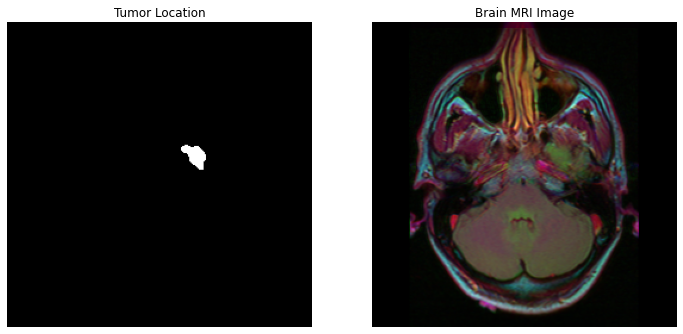

In [10]:
# Printing the Tumor Image
for i in range(len(brain_df)):
    if cv2.imread(brain_df['mask_path'][i]).max()>0:
        break

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(cv2.imread(brain_df['mask_path'][i]));
plt.title('Tumor Location')
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.imread(brain_df['image_path'][i]));
plt.title("Brain MRI Image")
plt.axis('off')
plt.show()

In [11]:
cv2.imread(brain_df['mask_path'][i]).max(),cv2.imread(brain_df['mask_path'][i]).min()

(255, 0)

# Plotting Random Images

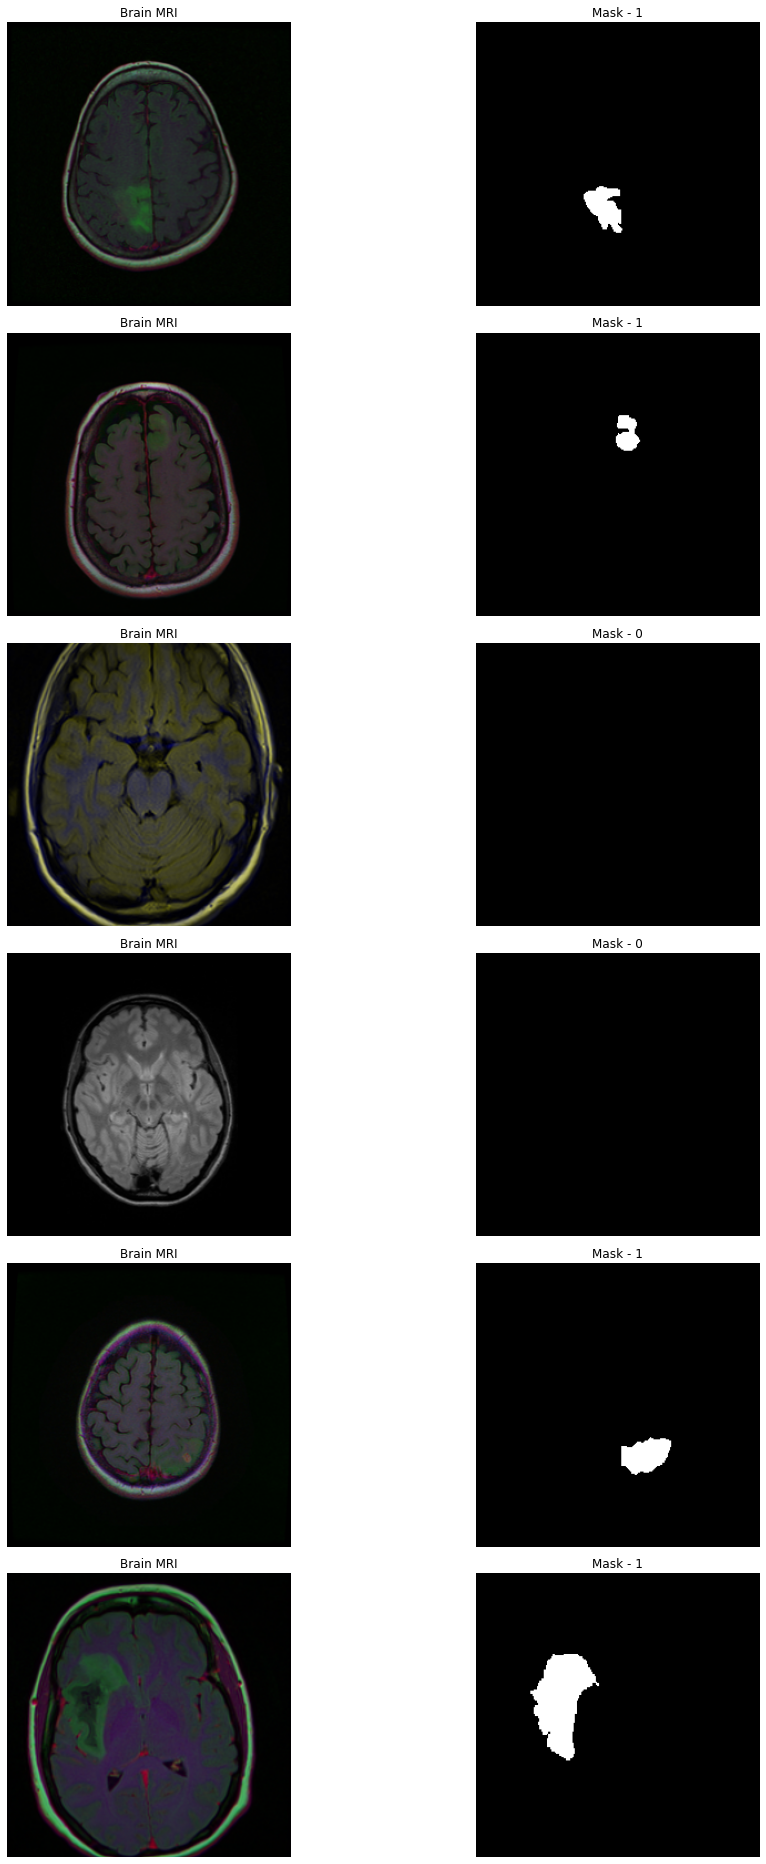

In [12]:
fig,axs = plt.subplots(6,2,figsize=(16,26))
count = 0
for x in range(6):
    i = random.randint(0,len(brain_df))
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(cv2.imread(brain_df['image_path'][i]))
    axs[count][1].title.set_text("Mask - "+str(brain_df['mask'][i]))
    axs[count][1].imshow(cv2.imread(brain_df['mask_path'][i]))
    axs[count][0].axis('off')
    axs[count][1].axis('off')
    count+=1
fig.tight_layout()

# Plotting the Images with Mask

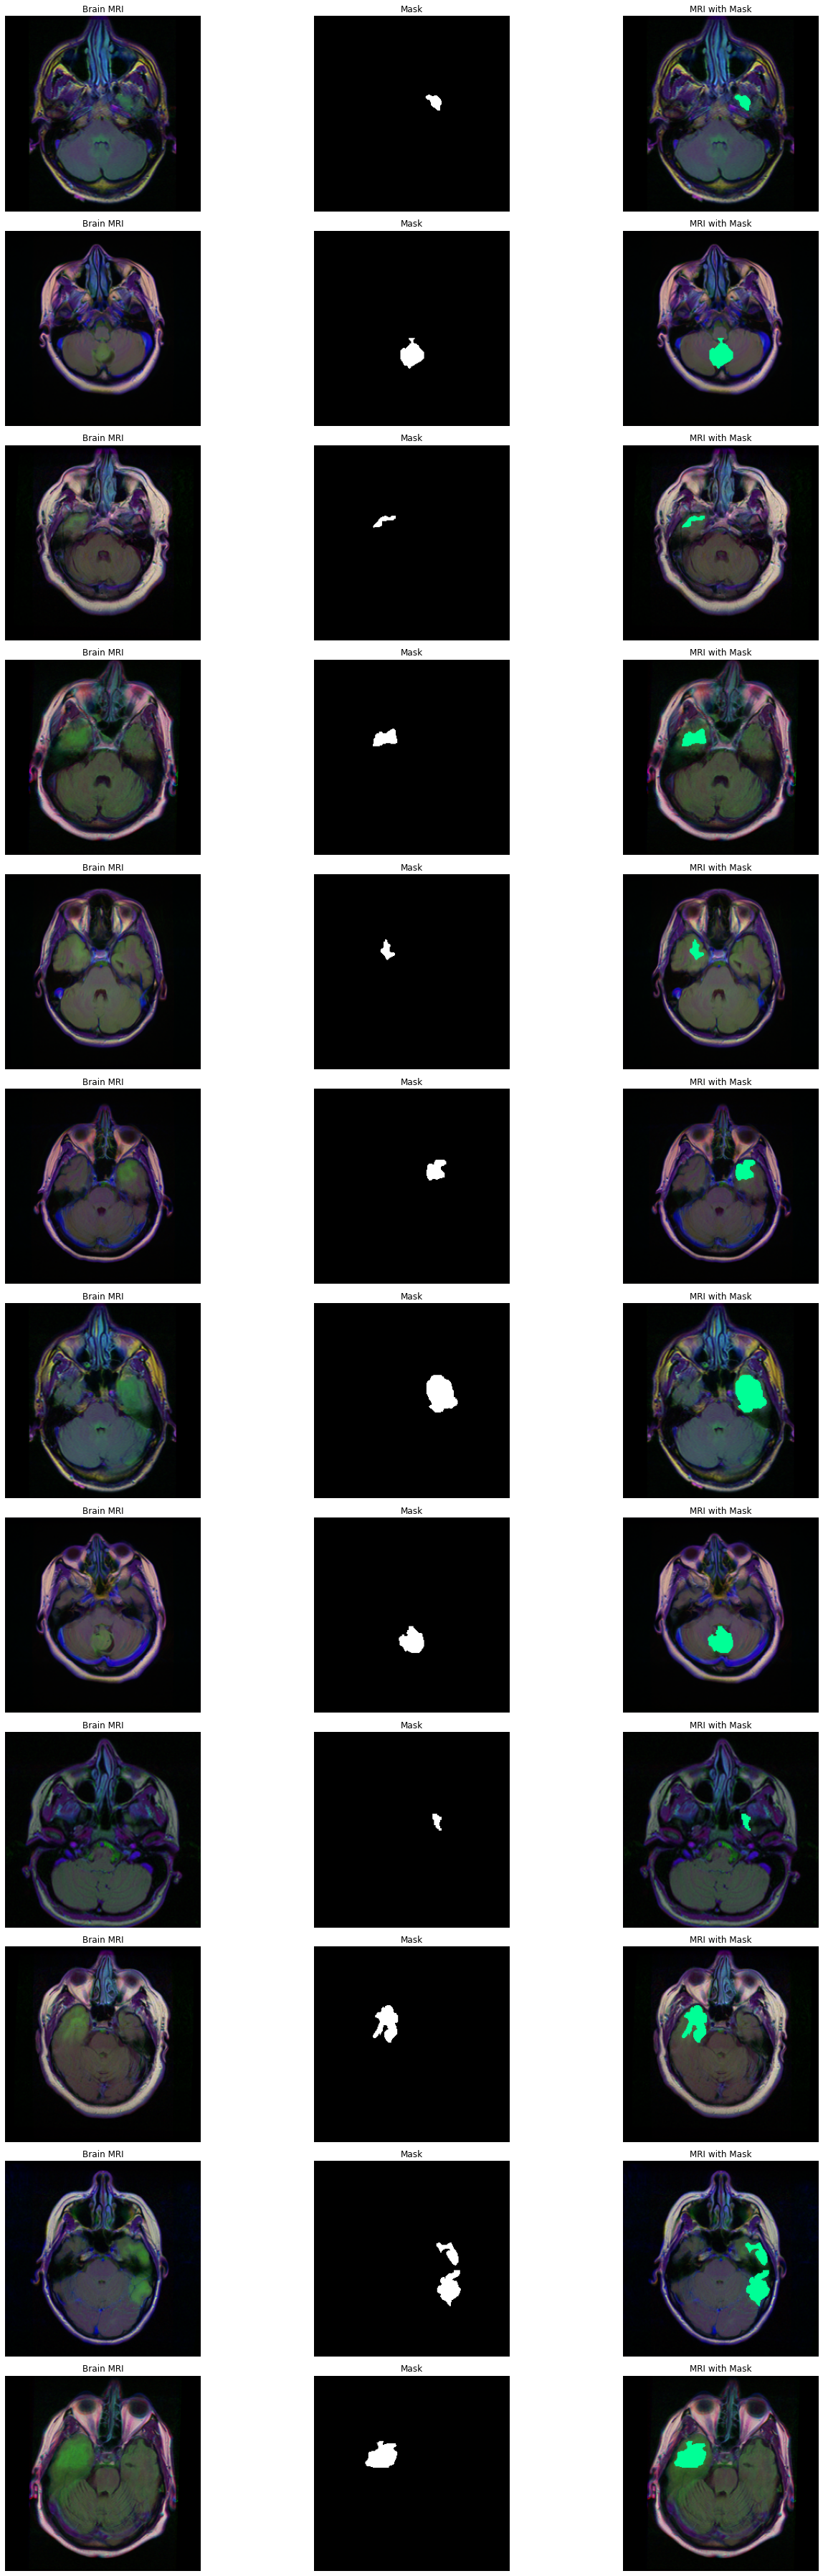

In [13]:
count = 0
i = 0
fig,axs= plt.subplots(12,3,figsize=(20,50))
for mask in brain_df['mask']:
    if(mask==1):
        img = io.imread(brain_df['image_path'][i])
        axs[count][0].title.set_text("Brain MRI")
        axs[count][0].imshow(img)
        
        mask = io.imread(brain_df['mask_path'][i])
        axs[count][1].title.set_text('Mask')
        axs[count][1].imshow(mask,cmap ='gray')
        img[mask==255]=(0,255,150)
        axs[count][2].title.set_text('MRI with Mask')
        axs[count][2].imshow(img)
        axs[count][0].axis('off')
        axs[count][1].axis('off')
        axs[count][2].axis('off')
        count+=1
    i+=1
    if(count==12):
        break
fig.tight_layout()

<a id="t3."></a>
# 3. CREATING TRAIN, VAL AND TEST DATASET
[Back to Top](#t0.)

In this section, we would be creating the dataset, so that it could be directly fed into the model :)

In [14]:
brain_df_train = brain_df.drop(columns=['patient_id'])
brain_df_train['mask'] = brain_df_train['mask'].apply(lambda x: str(x))
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [15]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(brain_df_train,test_size=0.15) # Splitting the data

In [16]:
from keras_preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)
# Creating dataset
train_generator = datagen.flow_from_dataframe(train,directory = './',
                x_col = 'image_path',y_col='mask',subset='training',class_mode='categorical',
                                             batch_size=16,shuffle=True,target_size=(256,256))
valid_generator = datagen.flow_from_dataframe(train,directory='./',
                                x_col = 'image_path',y_col = 'mask',
                                             subset='validation',class_mode='categorical',batch_size=16,shuffle=True,target_size=(256,256))
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(test,directory='./',x_col='image_path',y_col = 'mask',class_mode='categorical',batch_size=16,shuffle=False,target_size=(256,256))

Found 3006 validated image filenames belonging to 2 classes.
Found 333 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


<a id = "t4."></a>
# 4. CREATING AND TRAINING THE MODEL
[Back to Top](#t0.)
We would be using ResNet 50, for our classification task


In [17]:
from tensorflow.keras.applications.resnet50 import ResNet50
clf_model = ResNet50(weights='imagenet',include_top=False,input_tensor = Input(shape=(256,256,3)))
clf_model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
__________________________

In [18]:
head = clf_model.output
head = AveragePooling2D(pool_size=(4,4))(head)
head = Flatten(name='Flatten')(head)
head = Dense(256,activation='relu')(head)
head = Dropout(0.3)(head)
head = Dense(256,activation='relu')(head)
head = Dropout(0.3)(head)
head = Dense(2,activation='softmax')(head)

model = Model(clf_model.input,head)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [19]:
early_stopping= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15) # Early stopping, if our validation loss does not improve
check_pointer = ModelCheckpoint(filepath = 'clf-resnet-weights.hdf5',verbose=1,save_best_only=True) # Save only the best model, by monitoring the validation loss
reduce_lr = ReduceLROnPlateau(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta = 0.0001,factor=0.2) # Reduce the Learning Rate, by monitori
callbacks = [check_pointer,early_stopping,reduce_lr]

In [20]:
h = model.fit(train_generator,steps_per_epoch = train_generator.n//train_generator.batch_size,
                        epochs=100,validation_data=valid_generator,validation_steps = valid_generator.n//valid_generator.batch_size,
                             callbacks = [check_pointer,early_stopping])

Epoch 1/100
187/187 [==============================] - 36s 150ms/step - loss: 0.8946 - accuracy: 0.6987 - val_loss: 0.6744 - val_accuracy: 0.6625

Epoch 00001: val_loss improved from inf to 0.67438, saving model to clf-resnet-weights.hdf5
Epoch 2/100
187/187 [==============================] - 25s 135ms/step - loss: 0.4098 - accuracy: 0.8231 - val_loss: 0.7384 - val_accuracy: 0.6687

Epoch 00002: val_loss did not improve from 0.67438
Epoch 3/100
187/187 [==============================] - 25s 134ms/step - loss: 0.3987 - accuracy: 0.8339 - val_loss: 0.6434 - val_accuracy: 0.6656

Epoch 00003: val_loss improved from 0.67438 to 0.64337, saving model to clf-resnet-weights.hdf5
Epoch 4/100
187/187 [==============================] - 25s 134ms/step - loss: 0.2942 - accuracy: 0.8693 - val_loss: 0.7887 - val_accuracy: 0.6687

Epoch 00004: val_loss did not improve from 0.64337
Epoch 5/100
187/187 [==============================] - 25s 135ms/step - loss: 0.2745 - accuracy: 0.8790 - val_loss: 0.4693

In [21]:
# Saving the Model architecture in json file
model_json = model.to_json()
with open('clf-resnet-model.json','w') as json_file:
    json_file.write(model_json)
model.save('clf-brain.hdf5')

In [22]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<a id="t5."></a>
# 5. EVALUATION
[Back to Top](#t0.)

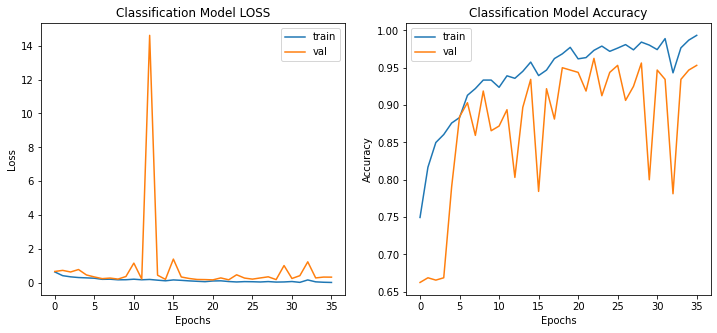

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title("Classification Model LOSS")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train','val'])

plt.subplot(122)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title("Classification Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['train','val'])
plt.show()

In [24]:
_,acc = model.evaluate(test_generator)
print("Test Accuracy :  {} %".format(acc*100))

37/37 [==============================] - 4s 107ms/step - loss: 0.3720 - accuracy: 0.9373
Test Accuracy :  93.72881650924683 %


0.9372881355932203
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       367
           1       0.99      0.84      0.91       223

    accuracy                           0.94       590
   macro avg       0.95      0.92      0.93       590
weighted avg       0.94      0.94      0.94       590



<AxesSubplot:>

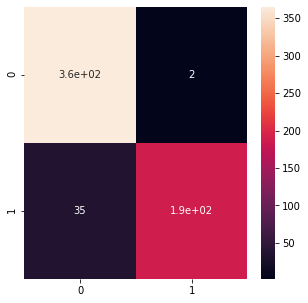

In [25]:
prediction = model.predict(test_generator)
pred = np.argmax(prediction,axis=1)
original = np.asarray(test['mask']).astype('int')

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(original,pred)
print(accuracy)

cm = confusion_matrix(original,pred)
report = classification_report(original,pred,labels=[0,1])
print(report)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)

## So, we can see that our model has perfomed well, now let us move to the Segmentation part

# b. Building a Segmentation Model to Localize Tumour
<a id ="t6."></a>
# 6. CREATING A DATASET OF MASKED ELEMENTS
[Back to Top](#t0.)

In [26]:
brain_df_mask = brain_df[brain_df['mask']==1]
brain_df_mask.shape

(1373, 4)

In [27]:
X_train,X_val = train_test_split(brain_df_mask,test_size=0.15)
X_test,X_val = train_test_split(X_val,test_size=0.5)

print("Train Size is {}, validation size is {} & test size is {}".format(len(X_train),len(X_val),len(X_test)))
      
train_ids = list(X_train.image_path)
train_mask = list(X_train.mask_path)
      
val_ids = list(X_val.image_path)
val_mask = list(X_val.mask_path)

Train Size is 1167, validation size is 103 & test size is 103


<a id ="t7."></a>
# 7. CREATING A CUSTOM DATA GENERATOR
[Back to Top](#t0.)

In [28]:
class DataGenerator(tf.keras.utils.Sequence):
  def __init__(self, ids , mask, image_dir = './', batch_size = 16, img_h = 256, img_w = 256, shuffle = True):

    self.ids = ids
    self.mask = mask
    self.image_dir = image_dir
    self.batch_size = batch_size
    self.img_h = img_h
    self.img_w = img_w
    self.shuffle = shuffle
    self.on_epoch_end()

  def __len__(self):
    'Get the number of batches per epoch'

    return int(np.floor(len(self.ids)) / self.batch_size)

  def __getitem__(self, index):
    'Generate a batch of data'

    #generate index of batch_size length
    indexes = self.indexes[index* self.batch_size : (index+1) * self.batch_size]

    #get the ImageId corresponding to the indexes created above based on batch size
    list_ids = [self.ids[i] for i in indexes]

    #get the MaskId corresponding to the indexes created above based on batch size
    list_mask = [self.mask[i] for i in indexes]


    #generate data for the X(features) and y(label)
    X, y = self.__data_generation(list_ids, list_mask)

    #returning the data
    return X, y
  def on_epoch_end(self):

    #get the ImageId corresponding to the indexes created above based on batch size
    self.indexes = np.arange(len(self.ids))

    #if shuffle is true, shuffle the indices
    if self.shuffle:
      np.random.shuffle(self.indexes)

  def __data_generation(self, list_ids, list_mask):
    'generate the data corresponding the indexes in a given batch of images'

    # create empty arrays of shape (batch_size,height,width,depth) 
    #Depth is 3 for input and depth is taken as 1 for output becasue mask consist only of 1 channel.
    X = np.empty((self.batch_size, self.img_h, self.img_w, 3))
    y = np.empty((self.batch_size, self.img_h, self.img_w, 1))

    #iterate through the dataframe rows, whose size is equal to the batch_size
    for i in range(len(list_ids)):
      #path of the image
      img_path = str(list_ids[i])
      
      #mask path
      mask_path = str(list_mask[i])
      
      #reading the original image and the corresponding mask image
      img = io.imread(img_path)
      mask = io.imread(mask_path)

      #resizing and coverting them to array of type float64
      img = cv2.resize(img,(self.img_h,self.img_w))
      img = np.array(img, dtype = np.float64)
      
      mask = cv2.resize(mask,(self.img_h,self.img_w))
      mask = np.array(mask, dtype = np.float64)

      #standardising 
      img -= img.mean()
      img /= img.std()
      
      mask -= mask.mean()
      mask /= mask.std()
      
      #Adding image to the empty array
      X[i,] = img
      
      #expanding the dimnesion of the image from (256,256) to (256,256,1)
      y[i,] = np.expand_dims(mask, axis = 2)
    
    #normalizing y
    y = (y > 0).astype(int)

    return X, y

train_data = DataGenerator(train_ids, train_mask)
val_data = DataGenerator(val_ids, val_mask)

<a id ="t8."></a>
# 8. CREATING A RESNET BLOCK
[Back to Top](#t0.)

In [29]:
def resblock(X,f):
    X_copy = X
    X  =Conv2D(f,kernel_size=(1,1),kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f,kernel_size=(3,3),padding='same',kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    
    X_copy = Conv2D(f,kernel_size=(1,1),kernel_initializer='he_normal')(X_copy)
    X_copy = BatchNormalization()(X_copy)
    
    X = Add()([X,X_copy])
    X =Activation('relu')(X)
    
    return X

def upsample_concat(x,skip):
    X = UpSampling2D((2,2))(x)
    merge = Concatenate()([X,skip])
    return merge

In [30]:
input_shape = (256,256,3)
X_input = Input(input_shape)

# Stage 1
conv_1 = Conv2D(16,3,activation='relu',padding='same',kernel_initializer='he_normal')(X_input)
conv_1 =BatchNormalization()(conv_1)
conv_1 = Conv2D(16,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv_1)
conv_1 = BatchNormalization()(conv_1)
pool_1 = MaxPool2D((2,2))(conv_1)

# Stage 2
conv_2 = resblock(pool_1,32)
pool_2 = MaxPool2D((2,2))(conv_2)

# Stage 3
conv_3 = resblock(pool_2,64)
pool_3 = MaxPool2D((2,2))(conv_3)

# Stage 4
conv_4 = resblock(pool_3,128)
pool_4 = MaxPool2D((2,2))(conv_4)

# Stage 5 (bottle neck)
conv_5 = resblock(pool_4,256)

# Upsample Stage 1
up_1 = upsample_concat(conv_5,conv_4)
up_1 = resblock(up_1,128)

# Upsample Stage 2
up_2 = upsample_concat(up_1,conv_3)
up_2 = resblock(up_2,64)

# Upsample Stage 3
up_3 = upsample_concat(up_2,conv_2)
up_3 = resblock(up_3,32)

# Upsample stage 4
up_4 = upsample_concat(up_3,conv_1)
up_4 = resblock(up_4,16)

out = Conv2D(1,(1,1),kernel_initializer='he_normal',padding='same',activation='sigmoid')(up_4)
seg_model = Model(X_input,out)
seg_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        batch_normalization[0][0]        
____________________________________________________________________________________________

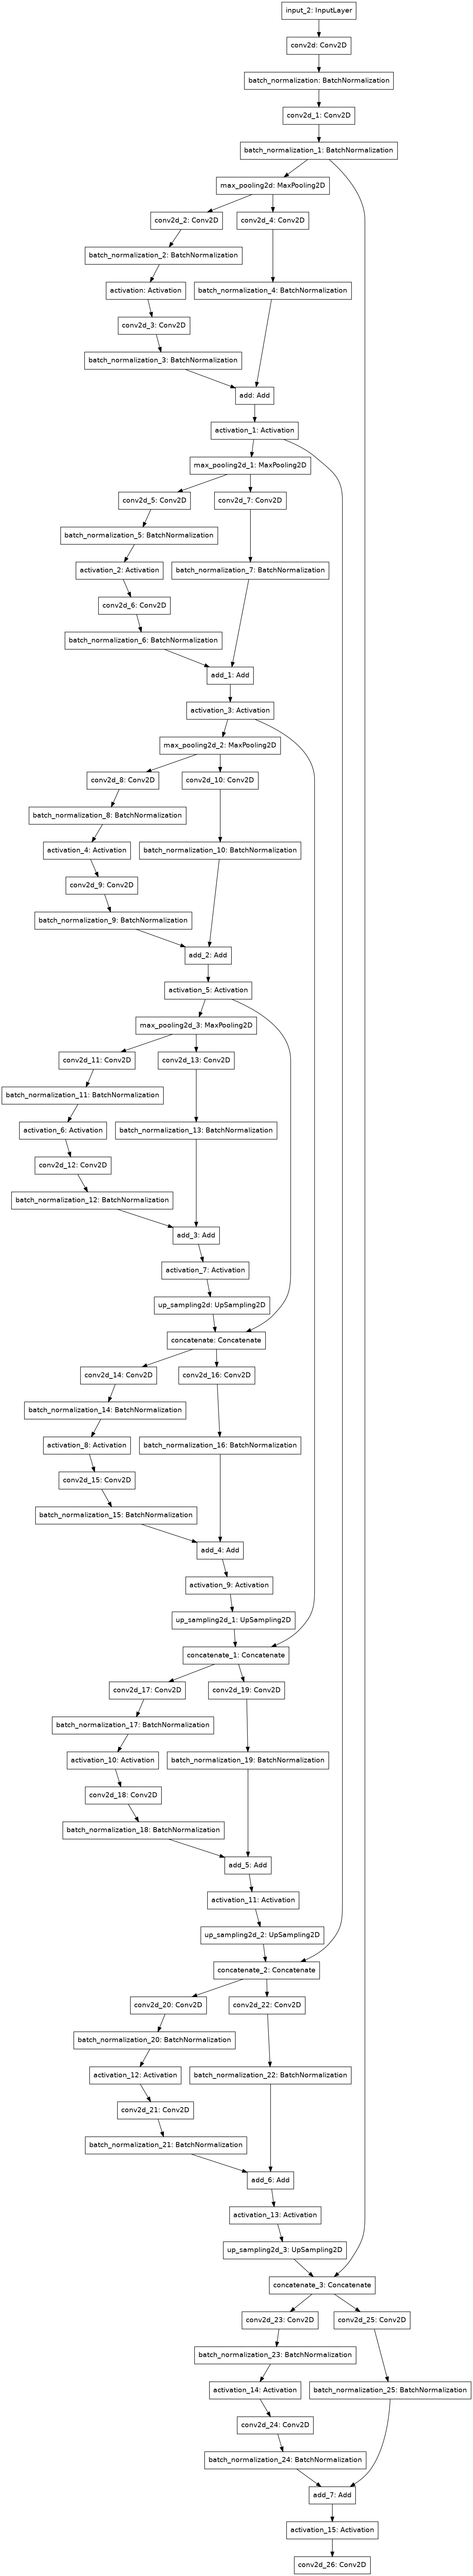

In [31]:
tf.keras.utils.plot_model(seg_model,to_file='seg_model.png')

<a id ="t9."></a>
# 9. TRAINING SEGMENTATION MODEL
[Back to Top](#t0.)

In [32]:
from keras.losses import binary_crossentropy

epsilon = 1e-5
smooth = 1

def tversky(y_true, y_pred):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def focal_tversky(y_true,y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)

In [33]:
# compling model and callbacks functions
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
seg_model.compile(optimizer = adam, 
                  loss = focal_tversky, 
                  metrics = [tversky]
                 )
#callbacks
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min', 
                              verbose=1, 
                              patience=20
                             )
# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="ResUNet-segModel-weights.hdf5", 
                               verbose=1, 
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=10,
                              min_delta=0.0001,
                              factor=0.2
                             )

In [34]:
h = seg_model.fit(train_data,epochs = 100,validation_data = val_data,callbacks=[checkpointer,early_stopping,reduce_lr])

Epoch 1/100
72/72 [==============================] - 12s 123ms/step - loss: 0.8723 - tversky: 0.1658 - val_loss: 0.7555 - val_tversky: 0.3111

Epoch 00001: val_loss improved from inf to 0.75549, saving model to ResUNet-segModel-weights.hdf5
Epoch 2/100
72/72 [==============================] - 8s 116ms/step - loss: 0.5263 - tversky: 0.5724 - val_loss: 0.6542 - val_tversky: 0.4308

Epoch 00002: val_loss improved from 0.75549 to 0.65418, saving model to ResUNet-segModel-weights.hdf5
Epoch 3/100
72/72 [==============================] - 8s 111ms/step - loss: 0.4045 - tversky: 0.6984 - val_loss: 0.4698 - val_tversky: 0.6335

Epoch 00003: val_loss improved from 0.65418 to 0.46985, saving model to ResUNet-segModel-weights.hdf5
Epoch 4/100
72/72 [==============================] - 9s 124ms/step - loss: 0.3350 - tversky: 0.7652 - val_loss: 0.3831 - val_tversky: 0.7215

Epoch 00004: val_loss improved from 0.46985 to 0.38310, saving model to ResUNet-segModel-weights.hdf5
Epoch 5/100
72/72 [========

In [35]:
# saving model achitecture in json file
seg_model_json = seg_model.to_json()
with open("ResUNet-seg-model.json", "w") as json_file:
    json_file.write(seg_model_json)
seg_model.save('seg_model_brain.hdf5')

<a id="t10."></a>
# 10 SEGMENTATION MODEL EVALUATION
[Back to Top](#t0.)

In [36]:
h.history.keys()

dict_keys(['loss', 'tversky', 'val_loss', 'val_tversky', 'lr'])

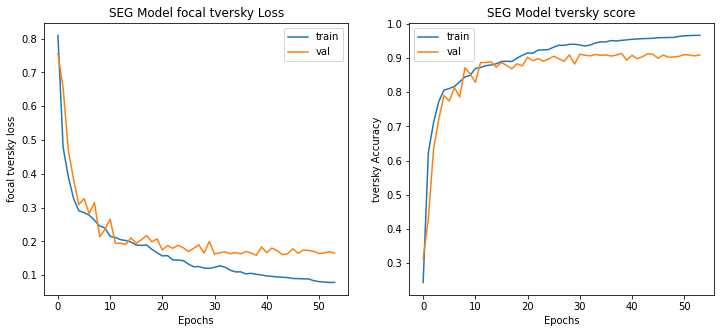

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(h.history['loss']);
plt.plot(h.history['val_loss']);
plt.title("SEG Model focal tversky Loss");
plt.ylabel("focal tversky loss");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

plt.subplot(1,2,2)
plt.plot(h.history['tversky']);
plt.plot(h.history['val_tversky']);
plt.title("SEG Model tversky score");
plt.ylabel("tversky Accuracy");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

In [38]:
test_ids = list(X_test.image_path)
test_mask = list(X_test.mask_path)
test_data = DataGenerator(test_ids, test_mask)
_, tv = seg_model.evaluate(test_data)
print("Segmentation tversky is {:.2f}%".format(tv*100))

6/6 [==============================] - 1s 89ms/step - loss: 0.1734 - tversky: 0.9030
Segmentation tversky is 90.30%


<a id="t11."></a>
# 11. PREDICTION OF THE SEGMENTATION MODEL
[Back to Top](#t0.)

In [39]:
def prediction(test,model,model_seg):
    mask,image_id,has_mask = [],[],[]
    
    for i in test.image_path:
        img = io.imread(i)
        img=img*1./255.0
        img = cv2.resize(img,(256,256))
        img = np.array(img,dtype=np.float64)
        img = np.reshape(img,(1,256,256,3))
        
        is_defect = model.predict(img)
        
        if np.argmax(is_defect) ==0:
            image_id.append(i)
            has_mask.append(0)
            mask.append("No Mask :)")
            continue
        
        X = np.empty((1,256,256,3))
        img = io.imread(i)
        img = cv2.resize(img,(256,256))
        img = np.array(img,dtype=np.float64)
        img-=img.mean()
        img/=img.std()
        X[0,] = img
        predict = model_seg.predict(X)
        if predict.round().astype(int).sum()==0:
            image_id.append(i)
            has_mask.append(0)
            mask.append("No Mask :)")
        else:
            image_id.append(i)
            has_mask.append(1)
            mask.append(predict)
    return pd.DataFrame({"image_path":image_id,'predicted_mask':mask,'has_mask':has_mask})

In [40]:
df_pred = prediction(test,model,seg_model)
df_pred

image_path  \
0    /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
1    /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
2    /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3    /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
4    /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
..                                                 ...   
585  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
586  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
587  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
588  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
589  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   

                                        predicted_mask  has_mask  
0                                           No Mask :)         0  
1                                           No Mask :)         0  
2                                           No Mask :)         0  
3                                           No Mask :)         0  
4                                           No Mask :)         0  
..                                                 ...       ...  
585  [[[[8.938212e-07], [2.0090853e-07], [2.598321e...         1  
586                                         No Mask :)         0  
587  [[[[7.8491195e-07], [1.0745233e-06], [1.481768...         1  
588  [[[[1.2150922e-06], [1.5902682e-06], [1.994451...         1  
589  [[[[2.3351793e-06], [2.1237306e-06], [3.082005...         1  

[590 rows x 3 columns]

In [41]:
df_pred = test.merge(df_pred,on='image_path')
df_pred.head(10)

image_path  \
0  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
1  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
2  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
4  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
5  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
6  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
7  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
8  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
9  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   

                                           mask_path mask  \
0  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...    0   
1  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...    0   
2  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...    0   
3  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...    1   
4  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...    0   
5  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...    0   
6  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...    0   
7  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...    1   
8  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...    1   
9  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...    0   

                                      predicted_mask  has_mask  
0                                         No Mask :)         0  
1                                         No Mask :)         0  
2                                         No Mask :)         0  
3                                         No Mask :)         0  
4                                         No Mask :)         0  
5                                         No Mask :)         0  
6                                         No Mask :)         0  
7  [[[[1.2129619e-06], [1.5736622e-06], [2.037427...         1  
8  [[[[6.760779e-07], [1.0040382e-06], [1.2823053...         1  
9                                         No Mask :)         0

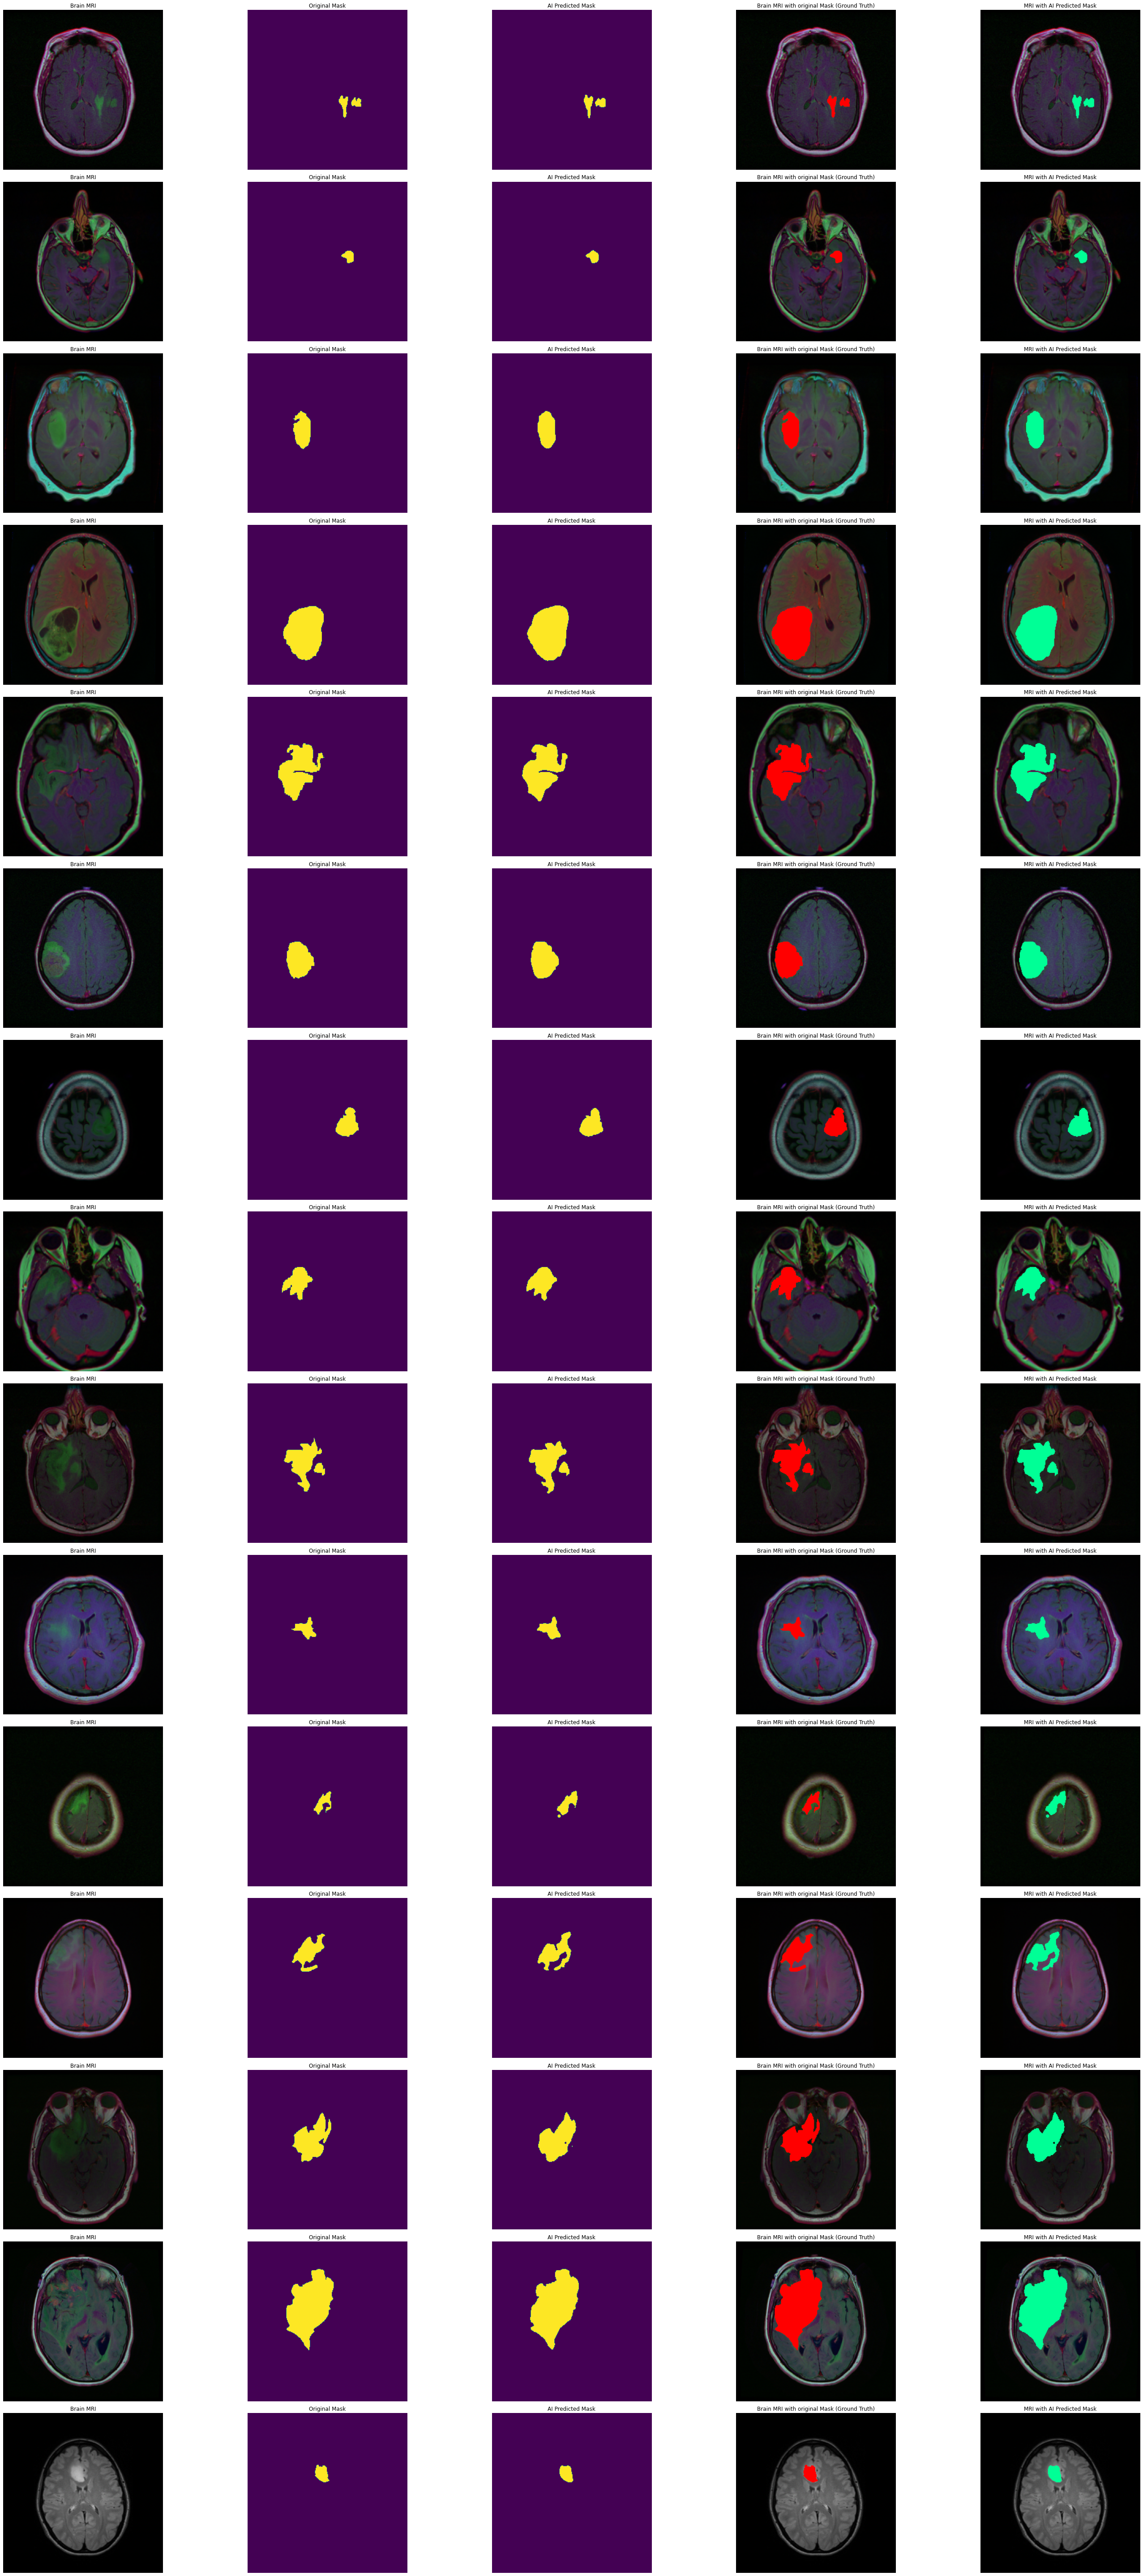

In [42]:
count = 0
fig,axs = plt.subplots(15,5,figsize=(40,80))
for i in range(len(df_pred)):
    if df_pred.has_mask[i]==1 and count<15:
        img = io.imread(df_pred.image_path[i])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        axs[count][0].imshow(img)
        axs[count][0].title.set_text("Brain MRI")
        axs[count][0].axis('off')
        
        mask = io.imread(df_pred.mask_path[i])
        axs[count][1].imshow(mask)
        axs[count][1].title.set_text("Original Mask")
        axs[count][1].axis('off')
        
        pred = np.array(df_pred.predicted_mask[i]).squeeze().round()
        axs[count][2].imshow(pred)
        axs[count][2].title.set_text("AI Predicted Mask")
        axs[count][2].axis('off')
        
        img[mask==255] =(255,0,0)
        axs[count][3].imshow(img)
        axs[count][3].title.set_text("Brain MRI with original Mask (Ground Truth)")
        axs[count][3].axis('off')
        
        img_ = io.imread(df_pred.image_path[i])
        img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
        img_[pred==1]= (0,255,150)
        axs[count][4].imshow(img_)
        axs[count][4].title.set_text("MRI with AI Predicted Mask")
        axs[count][4].axis('off')
        count+=1
    if(count==15):
        break
fig.tight_layout()

# Thanks A Lot For Coming Till Here, If You Liked My Work, Please Do Leave Feedback, So That I Can Improve The Quality Of The Upcoming Notebooks, Thanks :)